### Ensemble Learning: Voting, Bagging, Boosting and Stacking Classifiers

#### Introduction to Ensemble Learning {#introduction}
Ensemble learning is a powerful machine learning technique that combines multiple individual models (called "base learners" or "weak learners") to create a stronger, more robust predictor. The core idea is that by combining the predictions of several models, we can often achieve better performance than any single model alone.

#### Why Ensemble Learning Works
The effectiveness of ensemble methods is based on several key principles:

Diversity: Different models make different types of errors
Bias-Variance Trade-off: Combining models can reduce both bias and variance
Wisdom of Crowds: Multiple "opinions" often lead to better decisions

#### Types of Ensemble Methods
There are three main categories of ensemble methods:

**Voting**: Combines predictions through majority vote or averaging

**Bagging**: Trains multiple models on different subsets of data

**Stacking**: Uses a meta-learner to combine base model predictions

### Voting Classifiers {#voting-classifiers}

Voting classifiers combine the predictions of multiple different algorithms by taking either the majority vote (hard voting) or averaging the predicted probabilities (soft voting).

**Hard Voting**
In hard voting, each classifier makes a prediction (class label), and the final prediction is determined by majority vote.
Example: If we have 3 classifiers:

Classifier 1 predicts: Class A

Classifier 2 predicts: Class B

Classifier 3 predicts: Class A

Final prediction: Class A (2 votes vs 1 vote)

**Soft Voting**
In soft voting, each classifier outputs class probabilities, and the final prediction is based on the averaged probabilities.
Example: For a binary classification problem:

Classifier 1: [0.7, 0.3] (70% Class A, 30% Class B)

Classifier 2: [0.4, 0.6] (40% Class A, 60% Class B)

Classifier 3: [0.8, 0.2] (80% Class A, 20% Class B)

Average: [0.63, 0.37] → Final prediction: Class A

In [1]:
#IMPLEMENTATION EXAMPLE

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # probability=True for soft voting

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('dt', tree_clf), ('svm', svm_clf)],
    voting='soft'  # Use 'hard' for hard voting
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Compare with individual classifiers
for name, clf in [('Logistic Regression', log_reg), 
                  ('Decision Tree', tree_clf), 
                  ('SVM', svm_clf)]:
    clf.fit(X_train, y_train)
    y_pred_individual = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred_individual):.3f}")

Voting Classifier Accuracy: 0.860
Logistic Regression Accuracy: 0.850
Decision Tree Accuracy: 0.857
SVM Accuracy: 0.833


### Bagging Classifiers {#bagging-classifiers}

Bagging (Bootstrap Aggregating) trains multiple instances of the same algorithm on different subsets of the training data. Each subset is created through bootstrap sampling (sampling with replacement).

**How Bagging Works**

Bootstrap Sampling: Create multiple bootstrap samples from the original training set
Train Models: Train a separate model on each bootstrap sample
Aggregate Predictions: Combine predictions through voting (classification) or averaging (regression)

**Key Benefits**

Reduces Overfitting: Especially effective with high-variance models like decision trees
Improves Stability: Less sensitive to outliers and noise
Parallel Training: Models can be trained independently

Random Forest: A Popular Bagging Method
Random Forest extends bagging by introducing additional randomness:

Uses bootstrap sampling for training data
Randomly selects features at each split in decision trees

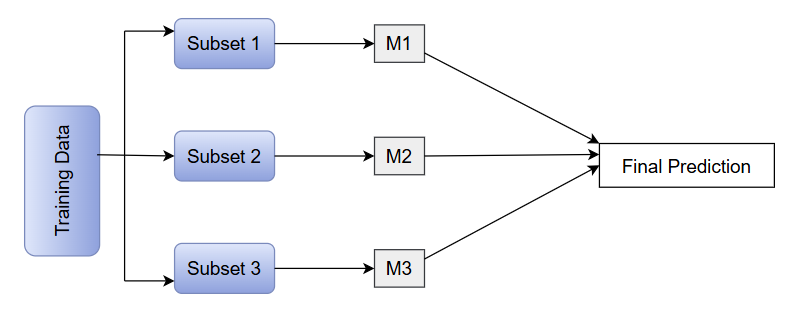

In [2]:
# IMPLEMENATATION EXAMPLE

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create bagging classifier
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,  # Number of base estimators
    random_state=42
)

# Create Random Forest for comparison
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train both models
bagging_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions
bagging_pred = bagging_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, bagging_pred):.3f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.3f}")

# Compare with single decision tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
single_pred = single_tree.predict(X_test)
print(f"Single Decision Tree Accuracy: {accuracy_score(y_test, single_pred):.3f}")

c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.863
Random Forest Accuracy: 0.857
Single Decision Tree Accuracy: 0.857


c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-package

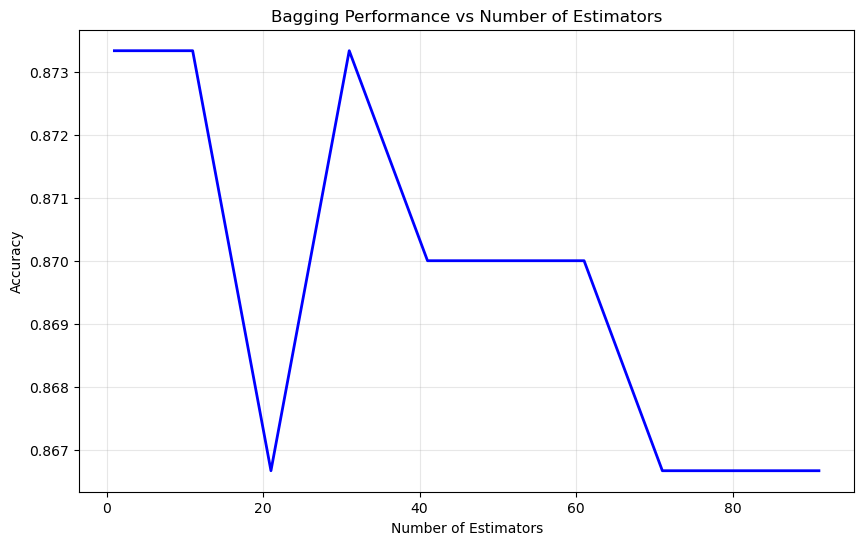

In [3]:
# VISUALIZATION OF BAGGING EFFECT

# Demonstrate how bagging reduces variance
n_estimators_range = range(1, 101, 10)
accuracies = []

for n_est in n_estimators_range:
    bagging_temp = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_est,
        random_state=42
    )
    bagging_temp.fit(X_train, y_train)
    pred_temp = bagging_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, 'b-', linewidth=2)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Bagging Performance vs Number of Estimators')
plt.grid(True, alpha=0.3)
plt.show()

### Boosting Classifier

Boosting is a powerful ensemble learning technique that combines multiple weak learners sequentially to create a strong predictor. Unlike bagging methods that train models independently, boosting trains models one after another, where each new model focuses on correcting the errors made by the previous models.

**Key Concepts**

Weak Learners: Simple models that perform slightly better than random guessing (e.g., decision stumps)

Sequential Training: Models are trained one after another, not in parallel

Adaptive Learning: Each model learns from the mistakes of previous models

Weighted Voting: Final prediction combines all models with different weights

**The Philosophy Behind Boosting**

The core idea of boosting is based on the question: "Can a set of weak learners create a single strong learner?" The answer is yes, and boosting provides the framework to achieve this by:

Focusing on Mistakes: Each new model pays more attention to previously misclassified examples

Iterative Improvement: Performance improves with each iteration

Combining Strengths: The final model leverages the collective knowledge of all weak learners

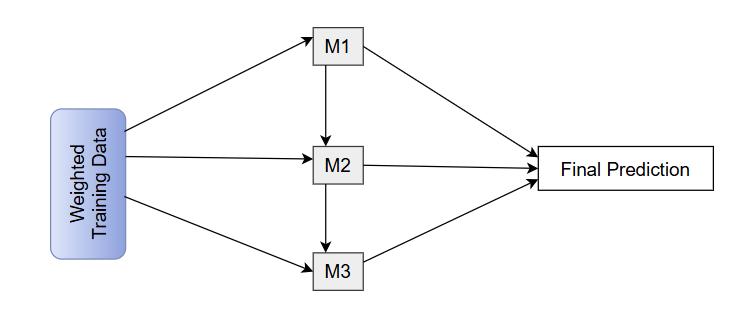

#### General Boosting Algorithm

#### Pseudo-code for general boosting algorithm



    def boosting_algorithm(X, y, T):  # T = number of iterations

        # Initialize sample weights uniformly
        weights = [1/N for _ in range(N)]  # N = number of samples
        models = []
        model_weights = []

        for t in range(T):
            # 1. Train weak learner on weighted data
            model_t = train_weak_learner(X, y, weights)
            
            # 2. Make predictions
            predictions_t = model_t.predict(X)
            
            # 3. Calculate weighted error
            error_t = calculate_weighted_error(y, predictions_t, weights)
            
            # 4. Calculate model weight (importance)
            alpha_t = calculate_model_weight(error_t)
            
            # 5. Update sample weights
            weights = update_sample_weights(weights, y, predictions_t, alpha_t)
            
            # 6. Store model and its weight
            models.append(model_t)
            model_weights.append(alpha_t)
        
        return models, model_weights

#### Main Boosting Algorithms:

**1. AdaBoost (Adaptive Boosting)**

Adjusts weights of incorrectly classified points.

Each new model focuses more on “hard” data.

Works well with clean data, but sensitive to noise.

**2. Gradient Boosting**

Fits the next model on the residual errors (gradient of the loss).

Very flexible, can minimize any differentiable loss function.

Commonly used in:

XGBoost (Extreme Gradient Boosting) – fast & accurate

LightGBM – very fast on large datasets

CatBoost – handles categorical data efficiently

**3. Stochastic Gradient Boosting**

Like Gradient Boosting, but uses random samples (like in bagging).

Reduces overfitting, improves generalization.

### Stacking Classifiers {#stacking-classifiers}

Stacking (Stacked Generalization) uses a meta-learner (also called a blender) to learn how to best combine the predictions of multiple base learners. Unlike voting, stacking learns the optimal way to combine predictions.

**How Stacking Works**

Train Base Learners: Train multiple different algorithms on the training data
Generate Meta-Features: Use cross-validation to generate predictions from base learners
Train Meta-Learner: Train a meta-learner using the base learner predictions as features
Make Final Predictions: Use the meta-learner to combine base learner predictions

**Two-Level Stacking Architecture**

Level 0 (Base Learners):
- Classifier 1 (e.g., Random Forest)
- Classifier 2 (e.g., SVM)
- Classifier 3 (e.g., Logistic Regression)
        ↓
        
Level 1 (Meta-Learner):
- Meta-Classifier (e.g., Linear Regression)
        ↓
        
Final Prediction

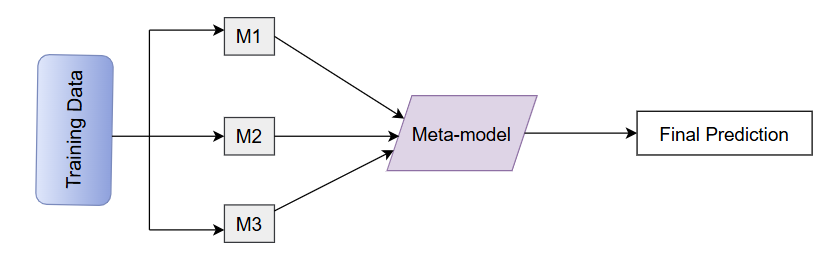

In [4]:
# IMPLEMENTATION EXAMPLE

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,  # Cross-validation folds for generating meta-features
    stack_method='predict_proba'  # Use probabilities as meta-features
)

# Train and evaluate
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)

print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, stacking_pred):.3f}")

# Compare with base learners
for name, clf in base_learners:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"{name.upper()} Accuracy: {accuracy_score(y_test, pred):.3f}")

Stacking Classifier Accuracy: 0.857
RF Accuracy: 0.857
SVM Accuracy: 0.833
KNN Accuracy: 0.803


### Comparison and When to Use Each Method {#comparison}





#### Voting Classifiers

Pros:

Simple to understand and implement
Works well when base classifiers have similar performance
Reduces overfitting by averaging predictions
Can improve performance over individual classifiers

Cons:

All classifiers have equal weight
May not perform well if base classifiers vary significantly in quality
Requires diverse classifiers for best results

When to Use:

When you have multiple well-performing classifiers
When you want a simple ensemble method
When interpretability is important





#### Bagging Classifiers

**Pros**:

Reduces variance and overfitting

Works particularly well with high-variance models (e.g., decision trees)

Can be parallelized easily

Provides out-of-bag error estimates

**Cons**:

May not improve performance much with low-variance models

Can be computationally expensive

Less effective on small datasets

**When to Use**:

When using high-variance algorithms (decision trees, neural networks)

When you have sufficient computational resources

When you want to reduce overfitting

### Boosting Classifiers

**Pros**:

Often achieves excellent performance

Converts weak learners into strong learners

Reduces both bias and variance

Good for handling imbalanced datasets

Natural feature selection

**Cons**:

Sensitive to outliers and noise

Risk of overfitting with too many iterations

Sequential training (cannot be parallelized)

Requires careful parameter tuning

Computationally intensive

**When to Use**:

When you want high predictive performance

When you have clean data (not too many outliers# Ensemble Learning: Voting, Bagging, and Stacking Classifiers

#### Stacking Classifiers

**Pros**:

Can learn optimal combination of base classifiers

Often achieves the best performance

Flexible in choice of meta-learner

Can capture complex relationships between base learner predictions

**Cons**:

More complex to implement and tune

Computationally expensive

Risk of overfitting at the meta-level

Requires careful cross-validation

**When to Use**:

When you want maximum performance

When you have diverse base learners

When computational cost is not a major concern

When you have sufficient data